In [2]:
from scipy import stats

From AI-Bootcamp: https://github.com/v-fuentec/AI-bootcamp

# Basic Concepts

<b>Statistic Inference:</b>
* Is generating conclusions about a population from a noisy sample.
* Extending our knowledge beyond our data.
* Many ways of doing it...

<b>Process of statistical inference:</b>
* Probability: model connects the data to the population using assumptions.
* Estimator: rule for calculating and estimate of a given quantity based on observed data.
* Estimand: Parameter in the population which is to be estimated.


<b>Probability:</b>
* We will try to estimate the population properties from samples (collected data)

<b>Some rules of probability:</b>
* Prob. that nothing occurs is 0
* Prob. something occurs is 1
* Prob_of_something = 1 - probability _opposite_thing
* Prob one or more of mutually exclusive events occur is $\sum_i{prob(event_i)}$
* Probability that one or more occurs:  P(A∪B)=P(A)+P(B)−P(A∩B)
* If statistically independent:  P(A∪B)=P(A)+P(B)
* If A and B are two independent events then the probability of them both occurring is the product of the probabilities.
 * P(A&B) = P(A) * P(B)

<b>Random variable:</b> numerical outcome of an experiment (observation, ...).
* Continuous (we assign probabilities to ranges they can take)
* Categorical (we assign probabilities to values they can take)

<b>Independence:</b>
* Independent: statistically unrelated to one another
* Independent events if prob. of their intersection is product of their independent probabilities
* IID: Independent and Identically Distributed random variables
* Identically distributed: all having been drawn from the same probability distribution.

<b>Probability Mass function (pmf):</b>
* Prob. that random variable takes a value
* Always >=0 and sum of all possible values must be 1

<b>Probability Density Function (pdf):</b>
* Associated to random continuous variables.
* Value >=0 and area under functions equals 1.
* Use areas under the curve to calculate probabilities of ranges

<b>Cumulative density function (cdf):</b>
* F(x) = P(X<=x)
* Works for continuous and categorical random variables.
* Survival function (is 1-CDF): S(x) = P(X>x)
* Inherently when you say probability you are talking about a population quality.

When the random variable is continuous, the PDF is the derivative of the CDF, so integrating the PDF yields the CDF.


<b>Quantiles:</b>

$\alpha^{th}$ quantile of a distribution with cumulative density distribution function F is the point $X_\alpha$ so that
$F(X_\alpha)=\alpha$
* $\alpha$ proportion is below X

<b>Percentiles:</b>
A percentile is a quantile with  expressed as a percent.
* 90 percentile -> 90% of the observations lie below
* Median is the 50th percentile


# Expected values

## Mean

The mean is a characterization of centrality.

Population mean:
* The expected value or mean of a random variable is the center of its distribution.
* $E[X] = \mu= \sum_i{x_i p(x_i)}$
* $E[X]$ represents the center of mass of a collection of locations and weights, $(x_i,p(x_i))$

Sample mean:
* The center of mass of the data is the empirical mean
* $\bar{x} =\sum_i{x_i p(x_i)}$ where $p(x_i)=1/n$
* The expected value of the sample mean is exactly the population mean that it's trying to estimate.
* The distribution of the sample mean, the population distribution of the sample mean, is centered in the same place
as the original population that the data is drawn from.
* The sample mean is unbiased (unbiased estimator) because its distribution is centered at what it’s trying to estimate.
* The more data goes into the sample mean, the more concentrated its density/mass function is around the population mean.


## Variance & Standard Deviation

Variance & Standard Deviation are measures of variation or spread.

### Variance:
* Is the expected value of the squared deviation of a random variable from its mean.
* Population: $\sigma^2=Var(X)=E[(X-\mu)^2]=\frac{1}{N}(X-\mu)^2$
* Sample: $S^2=\frac{1}{n-1}(X-\bar{x})^2$
 * It is also a random variable with an associated population distribution.
 * Its expected value is the population variance.
 * From wikipedia: "unbiased estimator for the variance is given by applying Bessel's correction, using N − 1 instead of N to yield the unbiased sample variance, denoted $S^2$"

### Standard deviation:
* Square root of the variance
 * Notation: $\sigma$ (population std. deviation) and S (sample std. deviation)
* This measure has the same units as the population
* Standard deviation of a statistic is called a standard error

## Z-score (a.k.a. Standard Score)
A standard score (a.k.a. Z-score) indicates how many standard deviations an element is from the mean.
* $Z = \frac{(X - \mu)}{\sigma}$


### IMPORTANT NOTES
<b>

* Our sample expected values for the sample mean and variance will estimate the population mean and variance respectively.
* The average of a random variable is itself a random variable and its associated distribution has  an expected value.
* The center of mass of this distribution is the same as that of the original distribution.

</b>

## Relation between sample and population statistics

Relation between sample and population means:
* $E[\hat{x}]=\mu$
* Sample means (means of random samples) estimate the population mean (their distribution is centered around it).
* Gets more concentrated around its center with larger sample sizes
* Variance of the sample mean is $\sigma^2/n$
 * Estimate of the variance of sample mean is $S^2/n$
 * Estimate of the standard error is $S/n$

Sample variance $S^2$ estimates the population variance $\sigma^2$:
* has a distribution centered around it
* gets more concentrated around its center with larger sample sizes

## Example: distribution, mean and variance for different sample sizes

Population theoric mean=0.0 std=1
Sample_size=10 sample_mean=-0.21268214532484103 sample_std=0.9766088555173603
Sample_size=50 sample_mean=-0.09704964365449607 sample_std=0.8996861319794697
Sample_size=200 sample_mean=0.059040122035416864 sample_std=1.0761752615779376
Sample_size=1000 sample_mean=0.04695614170996421 sample_std=1.0190267909371626


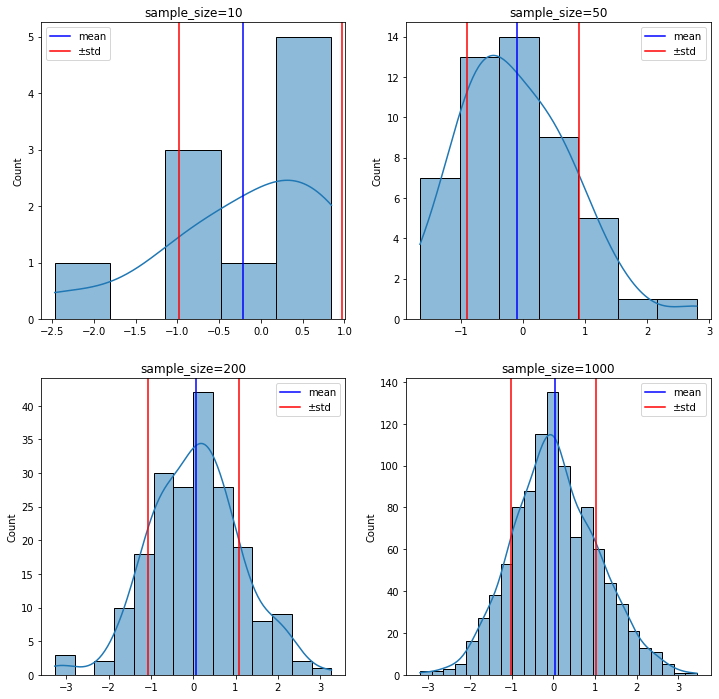

In [92]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

sample_sizes = [10, 50, 200, 1000]
f,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(12,12))
axs = [ax1,ax2,ax3,ax4]

print('Population theoric mean=0.0 std=1')

for sample_size,ax in zip(sample_sizes, axs):
    x = [np.random.normal() for _ in range(sample_size)]
    sns.histplot(x, kde=True, ax=ax)
    mean = np.mean(x)
    std = np.std(x)
    ax.axvline(mean, color='blue', label='mean')
    ax.axvline(std, color='red', label='±std')
    ax.axvline(-std, color='red')
    ax.set_title(f'sample_size={sample_size}')
    ax.legend()
    print(f'Sample_size={sample_size} sample_mean={mean} sample_std={std}')


# Baye's Rule

$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$

We call here:
* Posterior P(A|B)
* Likelihood P(B|A)
* Priors P(A),P(B)

We can find the same rule written in many different ways:
* $P(\theta|X)=\frac{P(X|\theta)P(\theta)}{P(X)}$

Here $\theta$ represents the parameters we're looking for and X our data.
* $P(\theta)$ is the prior, the distribution of $\theta$ when we haven’t collected any data
* $P(X|\theta)$ is the likelihood probability of the data X given (how likely is to find $X$ if $\theta$ is true)

In Machine Learning context we're usually trying to find:
* $\underset{\theta}{argmax}\ P(\theta|X)$

The Bayesian approach:
* we make assumptions on the underlying generating process (e.g. gaussian data...)
* we have a prior belief
    * choose a distribution or family of distributions maybe depending on the range of $\theta$. e.g.
        * $\theta \in [0,1]$ : $\theta \sim $ Beta(a,b). This distribution can have many different shapes depending on the value of the parameters (see Beta distribution section)
* we want to update that belief using the data and transform it into a posterior belief
    * the initial prior belief will have a less and less important role as we collect data

Using:
* $P(\theta|X)\propto P(X|\theta)P(\theta)$

Other typical nomenclatures:
* $D$ instead of $X$ to refer to our data
* $h$ (hypothesis) instead of $\theta$

Sources to check:
* "MIT 18.650 Statistics for Applications, Fall 2016" https://www.youtube.com/watch?v=bFZ-0FH5hfs
* "Artificial Intelligence: Reinforcement Learning in Python" https://www.udemy.com/course/artificial-intelligence-reinforcement-learning-in-python/


## Conjugate priors

Conjugate priors are special:
* if we pick the right likelihood and prior, the posterior will be the same kind of distribution as the prior
* Only works for certain distributions. E.g.
    * Gaussian $\propto$ Gaussian x Gaussian
    * Beta distribution is the conjugate prior for Bernoulli likelihood
    * ...



# Some Probability Distributions

## Methods of random variables on scipy.stats

Check:
* https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html
* https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats

"All continuous distributions take loc and scale as keyword parameters to adjust the location and scale of the distribution"

"Discrete distributions have mostly the same basic methods as the continuous distributions. However pdf is replaced by
the probability mass function pmf, no estimation methods, such as fit, are available, and scale is not a valid keyword parameter"


### Common methods of Random variables:
* rvs: Random Variates (argument size indicates how many we want)
* pdf: Probability Density Function (probability that the variate has the value x)
* cdf: Cumulative Distribution Function (probability that the variable takes a value less than or equal to x)
* sf: Survival Function (1-CDF) (probability that the variable takes a value greater than x)
* ppf: Percent Point Function (Inverse of CDF, given a probability calculates the corresponding x for the cumulative distribution)
 * ppf(0.95) value for which the random variable has a 95% probability of being less or equal to
* isf: Inverse Survival Function (Inverse of SF, given a probability calculates the corresponding x for the SF)
 * sf(0.10) value for which the random variable has 10% probability of being greater than
* stats: Return mean, variance, (Fisher’s) skew, or (Fisher’s) kurtosis
* moment: non-central moments of the distribution


## Normal or Gaussian

Abbreviated as $X \sim N(\mu,\sigma^2)$
* $E[X]=\mu$ and $Var(X)=\sigma^2$
* Standard normal distribution N(0,1) $\mu=0$ and $\sigma^2=1$
* Standard normal random variables are often labeled z

Its units can be thought as standard deviation units
Percentiles:
* 10, 5,  2.5 and 1 are -1.28, -1.645, -1.96, -2.33
* 90, 95, 97.5 and 99 are 1.28, 1.645, 1.96, 2.33
  * 1.96 contains 95% of the probability mass

Probability masses:
* $(\mu \pm \sigma)$ 68.2%=(34.1% x2)
* $(\mu \pm 2\sigma)$ 95.4%=(47.7% x2)
* $(\mu \pm 3\sigma)$ 99.7%=(49.85% x2)

Changing between standard and non-standard normals:
* Change units to standard deviations from the mean with $Z = \frac{(X - \mu)}{\sigma}  \sim N(0,1)$
* $X=\mu + \sigma Z \sim N(\mu,\sigma^2)$

Python's:
* scipy.stats.norm(loc=0, scale=1)

95.4% region with mean plus minus 2*sigma [-2.0, 2.0]
95.4% region with ppfs [-1.9953933101678245,1.9953933101678245]

Using ppf and isf to obtain the right side of the interval
1.9953933101678245 vs vs 1.9953933101678245
probability of lower or equal to 1.645 0.9500150944608786%, probability of a greater value 0.049984905539121376%


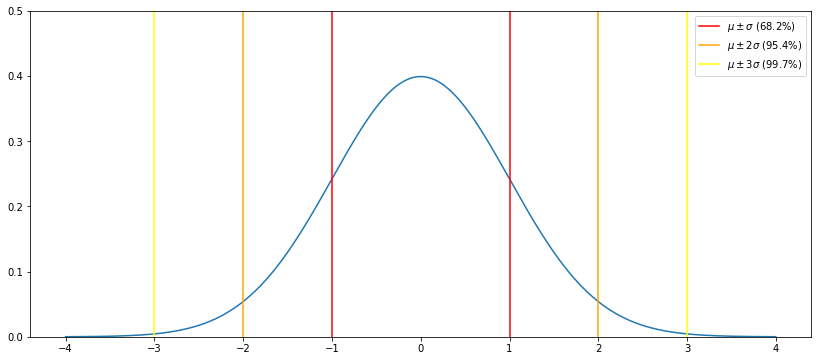

In [93]:
from scipy.stats import norm
import math
from matplotlib import pyplot as plt

mu = 0
sigma_sq = 1
sigma = math.sqrt(sigma_sq)

x = np.arange(-4, +4, 0.001)
plt.subplots(figsize=(14,6))
y = norm.pdf(x)
sns.lineplot(x=x, y=y)

ppf95 = norm.ppf(.954)
print(f'95.4% region with mean plus minus 2*sigma [{mu-2*sigma}, {mu+2*sigma}]')

left_tail_prob = (1-0.954)/2
right_tail_prob = (1-0.954)/2 # same as left_tail_prob (both tails hold the same total probability under them)
right_p = 1- right_tail_prob
print(f'95.4% region with ppfs [{norm.ppf(left_tail_prob)},{norm.ppf(right_p)}]')

print('\nUsing ppf and isf to obtain the right side of the interval')
print(f'{norm.ppf(right_p)} vs vs {norm.isf(right_tail_prob)}')

print(f'probability of lower or equal to 1.645 {norm.cdf(1.645)}%, probability of a greater value {norm.sf(1.645)}%')

plt.axvline(mu-sigma, color="red", label=r'$\mu \pm \sigma$ (68.2%)')
plt.axvline(mu+sigma, color="red")
plt.axvline(mu-2*sigma, color="orange", label=r'$\mu \pm 2\sigma$ (95.4%)')
plt.axvline(mu+2*sigma, color="orange")
plt.axvline(mu-3*sigma, color="yellow", label=r'$\mu \pm 3\sigma$ (99.7%)')
plt.axvline(mu+3*sigma, color="yellow")
plt.ylim(0,0.5)
plt.legend()

## Student's t-distribution

When we have samples of small size $n$ from a normally-distributed population with unknown variance.

"If we take a sample of $n$ observations from a normal distribution, the t-distribution with ν = n − 1 degrees
of freedom can be defined as the distribution of the location of the sample mean relative to the true mean, divided by
the sample standard deviation, after multiplying by the standardizing term $\sqrt {n}$. In this way, the t-distribution
can be used to construct a confidence interval for the true mean"
Source: https://en.wikipedia.org/wiki/Student%27s_t-distribution

(0, 0.5)

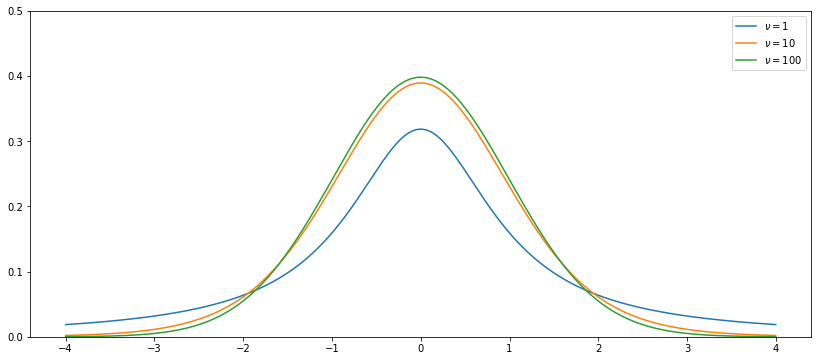

In [94]:
from scipy.stats import t

plt.subplots(figsize=(14,6))

#pdf is defined in the “standardized” form to shift/scale the distribution use the loc/scale parameters
sns.lineplot(x=x, y=t.pdf(x, df=1), label=r'$\nu=1$')
sns.lineplot(x=x, y=t.pdf(x, df=10), label=r'$\nu=10$')
sns.lineplot(x=x, y=t.pdf(x, df=100), label=r'$\nu=100$')
plt.ylim(0,0.5)

We can see how as $\nu$ gets bigger the  distribution has less spread. See Central Theorem Limit.

## Bernoulli

Discrete random variable with two possible outcomes, one with probability p and the other (1-p):
* probability mass function f(x) equal to p if x=1 and (1-p) if x=0


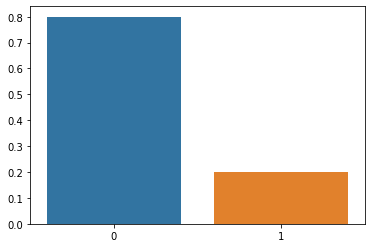

In [95]:
from scipy.stats import bernoulli

p=.2
x = [0,1]
sns.barplot(x=x, y=bernoulli.pmf(x, p), label=f'p={p}')

## Beta

$Beta(\alpha, \beta)$ is defined on the interval [0, 1].
"In Bayesian inference, the beta distribution is the conjugate prior probability distribution for the Bernoulli, binomial, negative binomial and geometric distributions. The beta distribution is a suitable model for the random behavior of percentages and proportions. "
Source: https://en.wikipedia.org/wiki/Beta_distribution

Shapes:
* Beta(1,1): uniform distribution
* $\alpha=\beta$ and greater than one: bell shaped, the higher the parameters value the narrower it gets
* $\alpha>\beta$: $\beta=1$ exponential growth
* $\alpha>\beta$: with  $\beta>1$ left skewed (less skewed the less difference there is between $\alpha$ and $\beta$)
* $\beta>\alpha$: $\alpha=1$ exponential decay
* $\beta>\alpha$: with  $\alpha>1$ right skewed (less skewed the less difference there is between $\alpha$ and $\beta$)


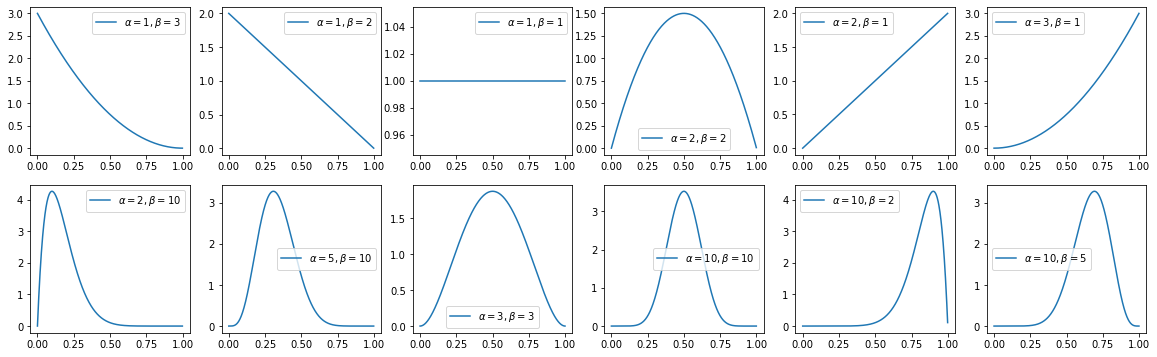

In [96]:
from scipy.stats import beta

parameters=[[(1,3), (1,2), (1,1),(2,2), (2,1),(3,1)],
            [(2,10), (5,10), (3,3),(10,10), (10,2),(10,5)]]
x = np.arange(0, 1, 0.001)
f, rows = plt.subplots(2,6, figsize=(20,6))
for ps, row in zip(parameters,rows):
    for  p, ax in zip(ps, row):
        sns.lineplot(x=x, y=beta.pdf(x, p[0], p[1]), ax=ax, label=rf'$\alpha={p[0]}, \beta={p[1]}$')

## Binomial

...

## Poisson

...

## Chi-squared ($\chi^2)$

...



## F-distribution

...

# Law of Large Numbers (LLN)

The average limits to what it's estimating, the population mean.
Averages of iid samples converge to the population means that they are estimating.

# Central Limit Theorem (CLT)

Asymptotics: refers to the behavior of estimators as the sample size
(or other relevant quantity) goes to infinity (or some other relevant number).


The Central Limit Theorem (CLT) states that the distribution of averages of IID variables (properly normalized) becomes
that of a standard normal as the sample size increases.
* $\frac{\bar{X_n}-\mu}{n}$ is (estimate - mean_of_estimate) / std_error_of_estimate
* Has a distribution like that of a standard normal for large n
 * $\bar{X}_n$ is approximately $N(\mu,\sigma/n)$
  * Centered around the mean
  * Sd = SE of the mean ($\sigma^2/n$)

IMPORTANT!!
* We can assume normality of a sample mean no matter what kind of population we have, as long as our sample
size is large enough and our samples are independent.

## Example: Distribution of sample means and sample variances

Text(0.5, 1.0, 'Mean of sample std.devs')

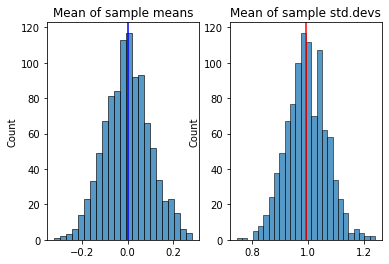

In [97]:
means = []
std_devs = []
n_samples = 1000
sample_size = 100

for _ in range(n_samples):
    x = [np.random.normal() for _ in range(sample_size)]
    means.append(np.mean(x))
    std_devs.append(np.std(x))

f, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(means, ax=ax1)
ax1.axvline(np.mean(means), color='blue')
ax1.set_title('Mean of sample means')

sns.histplot(std_devs, ax=ax2)
ax2.axvline(np.mean(std_devs), color='red')
ax2.set_title('Mean of sample std.devs')

# Covariance and Correlation
* The units of measurement of the covariance $Cov(X , Y)$ are those of $X$ times those of $Y$.
* By contrast, correlation coefficients, are a dimensionless measure of linear dependence. They measure how much of the
change of one variable is explained by its relation with the other.
* Covariance is in $(-\infty, \infty)$, Correlation is in $[-1, 1]$

Covariance is $Cov(X,Y) = E[(X-E[Y])(Y-E[Y])]$
* Positive covariance: means two variables change in the same direction
* Negative covariance: means two variables change in opposite direction
* Covariance zero: means there doesn't appear to be any relation in their change

Population covariance
* $\sigma_{xy} = \frac{(\sum{x_i-\mu_x})(\sum{y_i-\mu_y})}{N}$

Sample covariance:
* $S_{xy} = \frac{(\sum{x_i-\bar{x}})(\sum{y_i-\bar{y}})}{n-1}$

Pearson's Correlation:
* From Wikipedia:
 * "is invariant under separate changes in location and scale in the two variables"
 * "A value of 1 implies that a linear equation describes the relationship between X and Y perfectly, with all data
 points lying on a line for which Y increases as X increases. A value of −1 implies that all data points lie on a line for which Y decreases as X increases. "
* Population: $Correlation = \rho_{xy} = \frac{Cov(X,Y)}{\sigma_x \sigma_y}$
* Sample: $Correlation = r_{xy} = \frac{Cov(X,Y)}{S_x S_y} = \frac{1}{n-1} \sum_i (\frac{x-\bar{x}}{S_x})(\frac{y-\bar{y}}{S_y})$

Correlation and covariance matrices:
* The correlation matrix is a symmetrical matrix that contains the correlation coefficients between variables
(each cell between two variables, diagonal is a variable with itself).
* The covariance matrix ($K_{XX}$ or $\Sigma$) has the same structure but contains covariance coefficients.

Python's:
* numpy.cov(m, ...)
* numpy.corrcoef(x, y=None, ...)
* scipy.stats.pearsonr(x, y)

Text(0.5, 1.0, 'Correlation 1')

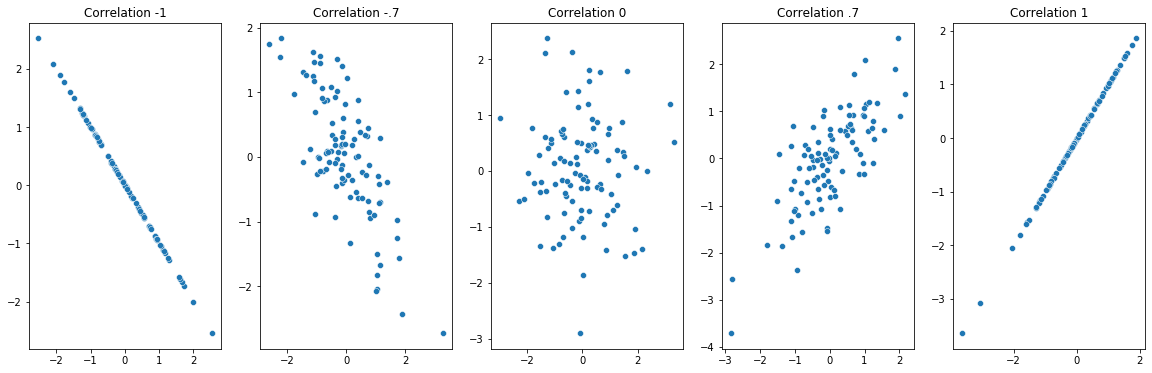

In [98]:
from numpy.random import multivariate_normal
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

mean = [0,0]
corr0 = [[1, 0],[0, 1]]
corr_pos = [[1, 1],[1, 1]]
corr_pos07 = [[1, .7],[.7, 1]]
corr_neg = [[1, -1],[-1, 1]]
corr_neg07 = [[1, -.7],[-.7, 1]]

x_0, y_0 = multivariate_normal(mean, corr0, 100).T
x_pos, y_pos  = multivariate_normal(mean, corr_pos, 100).T
x_pos07, y_pos07  = multivariate_normal(mean, corr_pos07, 100).T
x_neg, y_neg = multivariate_normal(mean, corr_neg, 100).T
x_neg07, y_neg07 = multivariate_normal(mean, corr_neg07, 100).T

f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize=(20,6))
sns.scatterplot(x=x_neg, y=y_neg, ax=ax1)
sns.scatterplot(x=x_neg07, y=y_neg07, ax=ax2)
sns.scatterplot(x=x_0, y=y_0, ax=ax3)
sns.scatterplot(x=x_pos07, y=y_pos07, ax=ax4)
sns.scatterplot(x=x_pos, y=y_pos, ax=ax5)
ax1.set_title("Correlation -1")
ax2.set_title("Correlation -.7")
ax3.set_title("Correlation 0")
ax4.set_title("Correlation .7")
ax5.set_title("Correlation 1")

# Confidence Intervals

...

# Hypothesis testing

Hypothesis testing is concerned with making decisions using data:
* A null hypothesis ($H_0$) is specified that represents the status quo
* The null hypothesis is assumed true and statistical evidence is required to reject in favor of a research or
alternative hypothesis (H_a).
* Alternative hypotheses are typically expressed as a condition ('<', '>' or '!=')
* In court law, the null hypothesis is that the defendant is innocent.

## Possible outcomes:

|Truth|Decide|Result|Example|
|---|---|---|---|
|$H_0$ |$H_0$ |Correctly accept $H_0$||
|$H_0$ |$H_a$ |Type I error |False positive! Innocent people convicted|
|$H_a$ |$H_a$ |Correctly reject $H_0$||
|$H_a$ |$H_0$ |Type II error |False negative! Guilty people let free|


## Choosing a rejection region:
The rejection region is the area of values of $\bar{X}$ (sometimes called $\mu_a$) were we can reject $H_0$ with a
Type I Error of up to $\alpha$ (we choose this value):
* For example, we could reject the null hypothesis if $\bar{X}$ (our sample or experimental mean) was larger than some constant C
* Typically C is chosen so that the probability of a Type I error, is .05 (or some other relevant constant)
* $\alpha$ = Type I error rate = Probability of rejecting the null hypothesis when it’s correct.

Example:
* $H_0: \mu = \mu_0$ y $H_a : \mu \gt \mu_0$
* Choose C so that $P(\bar{X}>C;H_0)$ is 5%
* Reject $H_0$ when $\bar{X} \ge C$ (probability of rejection is 5% when $H_0$ is true)
* When can convert to Z-score (to get how many standard errors the sample mean is above the hypothesized mean).
  * If it’s greater than 1.645 (the 0.95 quantile) we reject $H_0$ .
* Or when $(\bar{X}-\mu_0)/(s/\sqrt{n}) > Z_{1-\alpha}$ (using the appropriate upper quantile)
  * Our standarized value for $H_a$ if greater than the $Z_{1-\alpha}$ quantile.

## One side vs two sided tests
* One side tests have the forms $H_a : \mu_0 > \mu_a$ or $H_a : \mu_0 < \mu_a$
* Two sided test: $H_a : \mu_0 \neq \mu_a$ or $H_a : \mu_{a1} < \mu_0\ or\ \mu_0 < \mu_{a2}  $
 * With confidence $1-\alpha=.05$ we reject if $\mu_a$ lower than the lower quantile ($Z_{\alpha/2}$) or higher than the upper quantile ($Z_{1-\alpha/2}$)

## p-value

P-values are the most common measure of statistical significance.
* Formally, the p-value is the probability under the null hypothesis of obtaining evidence as or more extreme than that
obtained.
* p-values are a convenient way to communicate the results of a hypothesis test.
  * When communicating a p-value, the reader can perform the test at whatever Type I error rate that they would like.
  * Just compare the p-value to the desired Type I error rate and if the p-value is smaller, reject the null hypothesis.
* In other words if we get a very large T statistic the P-value answers the question:
  * "How likely would it be to get a statistic this large or larger if the null was actually true?".
  * If the answer to that question is "very unlikely", the p-value is very small, then it sheds doubt on the null being
  true, since you observed a statistic that extreme.

So:
* Start under the null hypothesis (asume is correct)  and then calculate the probability of obtaining evidence as or
more extreme that we actually obtain.
* How unusual is our result if the null hypothesis is true?
* If p-value is less than $\alpha$ you reject the null hypothesis.

For two sided hypothesis tests, double the smaller of the two sided hypothesis p-values.

Approach to calculate the p-value:
* Define hypothetical distribution of a data summary (statistic) when “nothing is going on” (null hypothesis).
* Calculate the summary/statistic with the data we have (test statistic).
* Compare what we calculated to our hypothetical distribution and see if the value is “extreme” (p-value is low).
* If p-value is small either $H_0$ is true and we have observed a rare event or it is false.

The attained significance level:
P-value can be seen as the smallest value of $\alpha$ for which you will still reject $H_0$.

## Connection with confidence intervals

Consider testing:
* $H_0: \mu = \mu_0$ y $H_a : \mu \neq \mu_0$

Considering all possible values for with you fail to reject $H_0$:
* This set is $(1-\alpha) 100$% C.I. for $\mu$

In reverse if a $(1-\alpha) 100$% interval contains $\mu_0$ we fail to reject $H_0$


Hypothesis testing in Python:

In [99]:
#TODO!
#....

# Normality tests

* Shapiro-Wilk normality test: shapiro
 * Null hypothesis that the data was drawn from a normal distribution
* Kolmogorov-Smirnov test for goodness of fit: kstest(rvs, cdf)
 * Null hypothesis, the two distributions are identical.
 * cdf: If a string, it should be the name of a distribution in `scipy.stats`, which will be used as the cdf function.
 * Use cdf='norm'
* Anderson-Darling test for data coming from a particular distribution: anderson(x, dist='norm')
 * "Critical values provided are for the following significance levels:
    normal/exponenential
      15%, 10%, 5%, 2.5%, 1%"
 * "If the returned statistic is larger than these critical values then for the corresponding significance level, the null hypothesis that the data come from the chosen distribution can be rejected."
* Other:
 * Jarque-Bera (scipy.stats.jarque_bera)
   * tests whether the sample data has the skewness and kurtosis matching a normal distribution.
   * only use with large number of samples (>2000)
 * Quantile-Quantile Plot (Q-Q Plot)
   * Relation between theoretical (if normally distributed) and actual quantiles
   * If data comes from a normal distribution should approximately present as straight line

Let's assume that if the p-value > 0.05, then we fail to reject the null hypothesis and we assume the distribution of our variable is normal/gaussian.

## Examples of normality tests

In [100]:
import random
x_random = [random.random() for _ in range(0,100)]
x_norm = [random.normalvariate(0,1) for _ in range(0,100)]

print("*** Results for random data ***")
#(statisticfloat, p-value)
shapiro = stats.shapiro(x_random)

ks = stats.kstest(x_random, cdf='norm')
anderson = stats.anderson(x_random, dist='norm')
print(f'Shapiro: {shapiro}\nKolmogorov-Smirnov: {ks}\nAnderson: {anderson}\n')
print(f'Shapiro p-value: {shapiro[1]} (>.05 {shapiro[1]>.05}!)\nKolmogorov-Smirnov p-value: {ks.pvalue} (>.05 {ks.pvalue>.05}!)\nAnderson result for 5%: {anderson.statistic<anderson.critical_values[2]}')

print("\n*** Results for normal data ***")
shapiro = stats.shapiro(x_norm)
ks = stats.kstest(x_norm, cdf='norm')
anderson = stats.anderson(x_norm, dist='norm')
print(f'Shapiro: {shapiro}\nKolmogorov-Smirnov: {ks}\nAnderson: {anderson}\n')
print(f'Shapiro p-value: {shapiro[1]} (>.05 {shapiro[1]>.05}!)\nKolmogorov-Smirnov p-value: {ks.pvalue} (>.05 {ks.pvalue>.05}!)\nAnderson result for 5%: {anderson.statistic<anderson.critical_values[2]}')


*** Results for random data ***
Shapiro: (0.9424100518226624, 0.00027128125657327473)
Kolmogorov-Smirnov: KstestResult(statistic=0.5021644771598104, pvalue=7.391259180580688e-24)
Anderson: AndersonResult(statistic=1.6481398119552324, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Shapiro p-value: 0.00027128125657327473 (>.05 False!)
Kolmogorov-Smirnov p-value: 7.391259180580688e-24 (>.05 False!)
Anderson result for 5%: False

*** Results for normal data ***
Shapiro: (0.9805135726928711, 0.14573170244693756)
Kolmogorov-Smirnov: KstestResult(statistic=0.1334413441623793, pvalue=0.05162434221562947)
Anderson: AndersonResult(statistic=0.475790172511779, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Shapiro p-value: 0.14573170244693756 (>.05 True!)
Kolmogorov-Smirnov p-value: 0.05162434221562947 (>.05 True!)
Anderson result for 5%: True


One difference between them:

In [101]:
x_norm0 = [random.normalvariate(0,1) for _ in range(0,100)]
x_norm1 = [random.normalvariate(1,1) for _ in range(0,100)]

shapiro0 = stats.shapiro(x_norm0)
ks0 = stats.kstest(x_norm0, cdf='norm')
anderson0 = stats.anderson(x_norm0, dist='norm')

shapiro1 = stats.shapiro(x_norm1)
ks1 = stats.kstest(x_norm1, cdf='norm')
anderson1 = stats.anderson(x_norm1, dist='norm')

print('Results at 5% for data sampled from N(0,1) vs N(1,1)\n*******************************************************')
print(f'Shapiro: {shapiro0[1]>.05} vs {shapiro1[1]>.05}')
print(f'Kolmogorov-Smirnov: {ks0.pvalue>.05} vs {ks1.pvalue>.05}')
print(f'Anderson: {anderson0.statistic<anderson.critical_values[2]} vs {anderson1.statistic<anderson.critical_values[2]}')

Results at 5% for data sampled from N(0,1) vs N(1,1)
*******************************************************
Shapiro: True vs True
Kolmogorov-Smirnov: True vs False
Anderson: True vs True


## Examples of Q-Q Plot

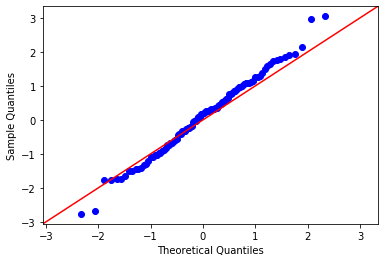

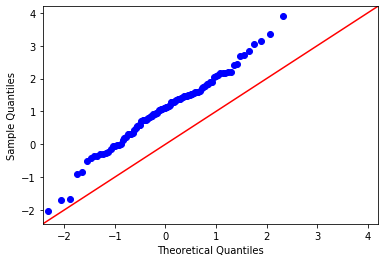

In [104]:
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.api as sm

sm.qqplot(np.array(x_norm0), line='45')
plt.show()
sm.qqplot(np.array(x_norm1), line='45')
plt.show()

# Equal Variance Tests
* All assume "null hypothesis that all input samples are from populations with equal variances."
* Levene: scipy.stats.levene(...)
 * "is an alternative to Bartlett’s test bartlett in the case where there are significant deviations from normality"
* Bartlett: scipy.stats.bartlett(...)
* Fligner-Killeen: scipy.stats.fligner(...)

## Example Equal Variance Tests
Let's assume that if the p-value > 0.05, then we fail to reject the null hypothesis and we assume the samples have the same variance.

In [105]:
x_norm0 = [random.normalvariate(0,1) for _ in range(0,100)]
x_norm1 = [random.normalvariate(1,1) for _ in range(0,100)]
x_norm2 = [random.normalvariate(2,1) for _ in range(0,100)]

#different variance
x_norm3 = [random.normalvariate(0,6) for _ in range(0,100)]

levene = stats.levene(x_norm0, x_norm1, x_norm2)
bartlett = stats.bartlett(x_norm0, x_norm1, x_norm2)
fligner = stats.fligner(x_norm0, x_norm1, x_norm2)

levene2 = stats.levene(x_norm0, x_norm3)
bartlett2 = stats.bartlett(x_norm0, x_norm3)
fligner2 = stats.fligner(x_norm0, x_norm3)


print(f'Results for equal variance samples\n{levene}\n{bartlett}\n{fligner}\n')
print(f'Results for different variance samples\n{levene2}\n{bartlett2}\n{fligner2}')

Results for equal variance samples
LeveneResult(statistic=2.5494000959259195, pvalue=0.07983735818945527)
BartlettResult(statistic=3.639097311000723, pvalue=0.16209889687113108)
FlignerResult(statistic=4.844387267203486, pvalue=0.08872676980172493)

Results for different variance samples
LeveneResult(statistic=74.0453728110401, pvalue=2.3462025392910634e-15)
BartlettResult(statistic=215.83010423032118, pvalue=7.344850999664462e-49)
FlignerResult(statistic=71.83655559539947, pvalue=2.3378093771293502e-17)


# ANOVA (ANalysis Of Variance)

ANOVA assumes:
* Samples are from normal distributions
 * Here can be checked also with "residuals are normally distributed"
* Populations with same variance
* Independent samples

We have:
* The null hypothesis for the test is that the means of all samples are equal.
 * Alternative is at least one mean is different.
* Independent variables are categorical and also known as factors
 * Groups or levels identify multiple samples with the same value for the factor.
* ANOVA is an omnibus test statistic and cannot tell you which specific groups were statistically significantly different from each other.
 * You can do this using a post hoc test like Tukey’s Honest Significant Difference (Tukey's HSD)
   * compares all possible pairs of group means

There are two kinds:
* One-way: 1 independent variable.
* Two-way: two independent variables.
 * With replication or without replication.
 * Takes into account variation at row level (if we see one-way as column variation)

Test results will include:
 * $F = \frac{between\ group\ variation}{within\ group\ variation}$
   * Larger F ratios indicate higher probability than the groups have different means
   * E.g. F-statistic of 10 means the between-groups variance is 10 times the within-group variance
 * p-value: if ANOVA's p-value is less than let's say 0.05 (we should choose this value, though 0.05 is typical) we have sufficient
 evidence to say that the means across each group are not equal (reject the null hypothesis that the means are the same).

Regarding the F-stat $F$, the F-distribution and the rejection region:
* F-distribution dfn (degrees of freedom numerator) is equal to $k-1$ ($k$ is the number of groups being compared)
* F-distribution dfd (degrees of freedom denominator) is equal to $N-k$ ($N$ is the total number of samples)
* To check the rejection region of the F-distribution for $H_0$ (groups means are equal) in python:
  * rejection_reg = scipy.stats.f.ppf(q=.95, dfn=(k-1)), dfd=(N-k))

In python:
* ANOVA:
 * one-way ANOVA: scipy.stats.f_oneway
 * statsmodels.stats.anova.anova_lm : "Anova table for one or more fitted linear models"
  * statsmodels.formula.api.ols: Ordinary Least Squares.
    * model = ols(formula,df).fit()
    * model.summary()
  * ANOVA type:
    * I:
    * II:
    * III:
* Tukey's HSD: statsmodels.stats.multicomp.pairwise_tukeyhsd(endog, groups, alpha=0.05)
 * endog: response variable
 * groups: array with groups
 * alpha: significance level for the test
 * Assumptions:
   * observations are independent
   * groups are normally distributed
   * homogeneity of within-group variance across the groups

The resulting ANOVA table for a single model has columns:
* sum_sq : Sum of squares for model terms.
* df : Degrees of freedom for model terms.
* F : F statistic value for significance of adding model terms.
* PR(>F) : P-value for significance of adding model terms.

The calculation of the F-stat uses (see: https://medium.com/@rrfd/f-tests-and-anovas-examples-with-the-iris-dataset-fe7caa3e21d0 ):
* F = (Mean Squared Between) / (Mean Squared Error)
* Mean Squared Between = MSB / (k-1)
 * is the variance between groups
 * k is df of independent variable
 * MSB = sum of the squared error (sum_sq) between each group mean and the overall mean
* Mean Squared Error = MSE / (n-k)
 * is the variance within groups
 * N is df of Residual
 * MSE = sum of the squared error (sum_sq of Residual) between each observation and its own group mean


## R-like formulas, general form:
* dependent-variable ~ independent_variables_formula

Formula operators:
* "C(variable)": treat variable as categorical.
* "+": adds columns
* ":": adds new column with the product of two
* "*": adds new column with the product of two and includes individual columns
* "-": removes columns ("-1" to remove incercept)
* You can apply vectorized functions to the variables in your model "func(column)"

## Example 1: One-way ANOVA with scipy.stats.f_oneway


In [106]:
from scipy.stats import f_oneway

x_norm0 = [random.normalvariate(0,1) for _ in range(0,200)]
x_norm1 = [random.normalvariate(1,1) for _ in range(0,200)]
x_norm2 = [random.normalvariate(2,1) for _ in range(0,200)]

shapiro0 = stats.shapiro(x_norm0)
shapiro1 = stats.shapiro(x_norm1)
shapiro2 = stats.shapiro(x_norm2)
levene = stats.levene(x_norm0, x_norm1, x_norm2)

print("\n".join(map(str,[shapiro0, shapiro1, shapiro2, levene])))

anova = f_oneway(x_norm0, x_norm1, x_norm2)

print(anova)
print(f'Different Means? {anova.pvalue<0.05}')

(0.9906993508338928, 0.22555264830589294)
(0.9877228736877441, 0.08189709484577179)
(0.9776571989059448, 0.0028020639438182116)
LeveneResult(statistic=0.572264862951607, pvalue=0.5645552598635284)
F_onewayResult(statistic=226.28344603511187, pvalue=7.191445872867872e-74)
Different Means? True


## Example 2: ANOVA


Perform preliminary tests.

In [107]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

from sklearn import datasets
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot as plt
import numpy as np

iris = datasets.load_iris()
column_names = ['sepal_l', 'sepal_w', 'petal_l', 'petal_w']
df = DataFrame(data=iris.data, columns=column_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

aux = df.groupby([df['species']])
for c in column_names:
    print("\n****** Shapiro test",c)
    aux_df = aux[c].apply(lambda x: pd.Series(stats.shapiro(x), index=["statistic","p-value"]))
    print(aux_df)
    print("\n***** ",
          stats.levene(
              df[df['species']=='setosa'][c],
              df[df['species']=='versicolor'][c],
              df[df['species']=='virginica'][c]))



****** Shapiro test sepal_l
species              
setosa      statistic    0.977699
            p-value      0.459528
versicolor  statistic    0.977836
            p-value      0.464733
virginica   statistic    0.971180
            p-value      0.258325
Name: sepal_l, dtype: float64

*****  LeveneResult(statistic=6.35272002048269, pvalue=0.0022585277836218586)

****** Shapiro test sepal_w
species              
setosa      statistic    0.971720
            p-value      0.271526
versicolor  statistic    0.974133
            p-value      0.337989
virginica   statistic    0.967391
            p-value      0.180904
Name: sepal_w, dtype: float64

*****  LeveneResult(statistic=0.5902115655853319, pvalue=0.5555178984739075)

****** Shapiro test petal_l
species              
setosa      statistic    0.954977
            p-value      0.054810
versicolor  statistic    0.966005
            p-value      0.158483
virginica   statistic    0.962186
            p-value      0.109774
Name: petal_l, dty

Test results show:
* petal_l doesn't pass the Levene test
* petal_w fails both Shapiro and Levene tests

***** Some OLS internals *****

OLF summary
                             OLS Regression Results                            
Dep. Variable:                sepal_l   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     119.3
Date:                Mon, 22 Feb 2021   Prob (F-statistic):           1.67e-31
Time:                        12:17:16   Log-Likelihood:                -111.73
No. Observations:                 150   AIC:                             229.5
Df Residuals:                     147   BIC:                             238.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

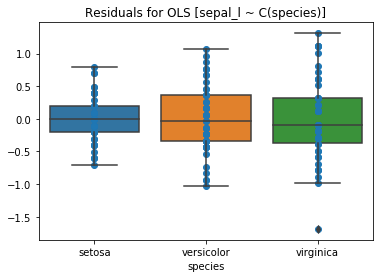

In [108]:
import seaborn as sns

formula = "sepal_l ~ C(species)"
model = ols(formula, df).fit()
print("***** Some OLS internals *****\n")
print("OLF summary\n", model.summary())
print("OLF influente summary\n", model.get_influence().summary_frame())
print("OLF residuals\n", model.resid)

plt.scatter(df['species'], model.resid.array)
sns.boxplot(x=df['species'], y=model.resid)
plt.title("Residuals for OLS ["+formula+"]")
plt.show()

Here we see the normaly distributed residuals for sepal_l.

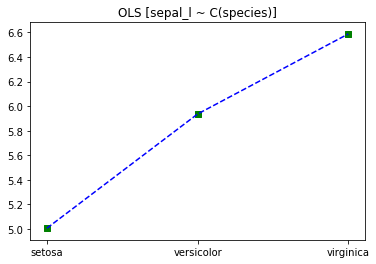

OLS predictions for data [sepal_l ~ C(species)]
[5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006
 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006
 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006
 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006
 5.006 5.006 5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936
 5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936
 5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936
 5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936
 5.936 5.936 5.936 5.936 6.588 6.588 6.588 6.588 6.588 6.588 6.588 6.588
 6.588 6.588 6.588 6.588 6.588 6.588 6.588 6.588 6.588 6.588 6.588 6.588
 6.588 6.588 6.588 6.588 6.588 6.588 6.588 6.588 6.588 6.588 6.588 6.588
 6.588 6.588 6.588 6.588 6.588 6.588 6.588 6.588 6.588 6.588 6.588 6.588
 6.588 6.588 6.588 6.588 6.588 6.588]


In [109]:
x = DataFrame(data=[['setosa'],['versicolor'],['virginica']], columns=['species'])
y = model.predict(x)
f, ax = plt.subplots()
plt.scatter(x['species'],y, color="g", marker="s")
plt.plot(y, 'b--')
plt.title("OLS ["+formula+"]")
#ax.set_xticks([0,1,2])
#ax.set_xticklabels(['setosa','versicolor','virginica'])
plt.show()

print("OLS predictions for data ["+formula+"]")
print(model.predict())

We can see also OLS model's predicted values for sepal_l for each class.

Now for the ANOVA results.

In [110]:
aov_table = anova_lm(model, typ=1)

print(f'\n\nAOV for [{formula}]:')
print(aov_table)



AOV for [sepal_l ~ C(species)]:
               df     sum_sq    mean_sq           F        PR(>F)
C(species)    2.0  63.212133  31.606067  119.264502  1.669669e-31
Residual    147.0  38.956200   0.265008         NaN           NaN


The AOV results for "sepal_l ~ C(species)" are significant, see value of PR(>F):
* We reject the null hypothesis that the sepal_l ofr each species have the same mean.

## Example 3: ANOVA and Tukey HSD

In [111]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

formula1 = "sepal_l ~ C(species)"
formula2 = "sepal_w ~ C(species)"

print("**** ANOVA ****")
for f in [formula1, formula2]:
    model = ols(f, df).fit()
    aov_table = anova_lm(model, typ=1)
    print(f'\nAOV for [{f}]:')
    print(aov_table)

print("\n**** Tukey ****\n")
tukey1 = pairwise_tukeyhsd(endog=df['sepal_l'], groups=df['species'])
tukey2 = pairwise_tukeyhsd(endog=df['sepal_w'], groups=df['species'])

print("sepal_length\n", tukey1,"\n")
print("sepal_width\n", tukey2,"\n")

**** ANOVA ****

AOV for [sepal_l ~ C(species)]:
               df     sum_sq    mean_sq           F        PR(>F)
C(species)    2.0  63.212133  31.606067  119.264502  1.669669e-31
Residual    147.0  38.956200   0.265008         NaN           NaN

AOV for [sepal_w ~ C(species)]:
               df     sum_sq   mean_sq         F        PR(>F)
C(species)    2.0  11.344933  5.672467  49.16004  4.492017e-17
Residual    147.0  16.962000  0.115388       NaN           NaN

**** Tukey ****

sepal_length
    Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor     0.93 0.001 0.6862 1.1738   True
    setosa  virginica    1.582 0.001 1.3382 1.8258   True
versicolor  virginica    0.652 0.001 0.4082 0.8958   True
--------------------------------------------------------- 

sepal_width
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     grou

Here we see ANOVA and Tukey HSD results for:
* sepal_l ~ C(species)
* sepal_w ~ C(species)

In both cases results are significant and we can see the confidence intervals for the mean differences between groups.